In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**1. Define data problems**

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
Given the training data set, we want to predict if some passengers survived or not.

**2. Import data**

In [2]:
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')
combine = [train_data, test_data]


**3. Analyze by describing data**

data preview

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Categorical features: Survied, Pclass, Sex, Embarked

Numerical features: Age, SibSp(number of siblings), Fare

Mix: Ticket

In [6]:
train_data.info()
print('==============================================')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

**Missing value** from training set: Age, Cabin, Embarked

**Missing value** from testing set: Age, Fare, Cabin

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Early numerical features insights**

1. According to problem description, there are 1502 out of 2224 passengers were killed. The observed surviving rate is (2224-1502)/2224 = 32%. Whereas in training set, surviving rate is 38%.

2. Most of people (>50%) were Pclass 3.

3. The passengers were relatively young.

4. Most of people (around 50% - 75%) were not travling with siblings or spouse.

5. Near 25% of people were travelling with parents and children.

6. Fares varied significantly with few passengers (<1%) paying as high as $512.

In [8]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Early categorical features insights**

1. Names are unique.

2. 577/891 = 65% are male.

3. Some passengers shared one cabin.

4. Most of people embarked S.

*****Analyze by pivoting ******

1. Pclass - Survived: Significant correlation among Pclass=1 -> feature kept

2. Sex - Survived: Significant correlation among Sex=Female -> feature kept

3. Sibsp - Survived: Some index have zero correlation -> derive and create new features

4. Parch - Survived: Some index have zero correlation -> derive and create new features

In [9]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [10]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [12]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


**Analyze by data visualization**

1. Numeric feature: Age - Survived: Mostly age group 18 - 30 did not survive -> Feature kept, fill missing values, create age groups

2. Numeric Ordinal feature: Age - Pclass - Survived: Most people in Class1 survived, whereas most people in Class3 did not; Most infants in Class3 survived. -> Feature kept

3. Categorical feature:Embarked - Pclass - Sex - Survived: Feature kept, filling missing values

4. Categorial & numerical features: Fare - Survived Higher fare paying passengers had better survival. Feature fare kept and creat groups.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

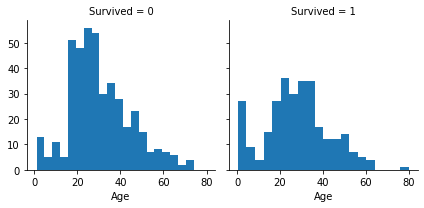

In [14]:
age = sns.FacetGrid(train_data, col='Survived')
age.map(plt.hist, 'Age', bins = 20)

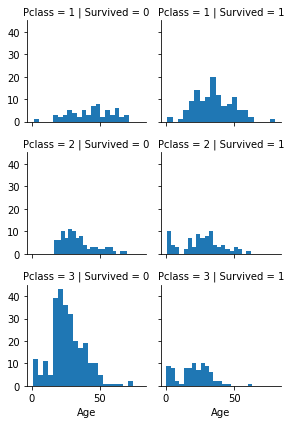

In [15]:
pclass = sns.FacetGrid(train_data, col='Survived', row='Pclass',height=2, aspect=1)
pclass.map(plt.hist, 'Age', bins=20)
pclass.add_legend();

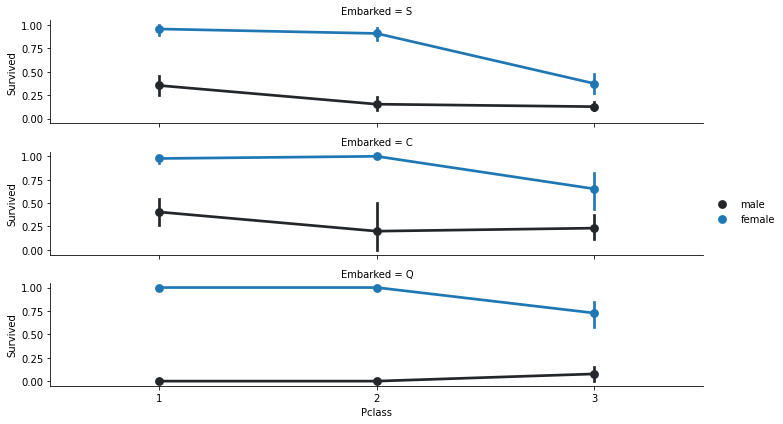

In [16]:
embarked = sns.FacetGrid(train_data, row='Embarked', height=2, aspect=5)
embarked.map(sns.pointplot, 'Pclass','Survived', 'Sex', paletee='deep', order=[1, 2, 3], hue_order=["male", "female"])
embarked.add_legend()



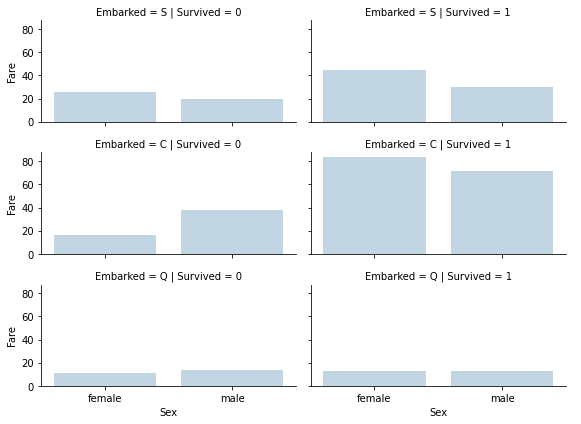

In [17]:
fare = sns.FacetGrid(train_data, row='Embarked', col='Survived', height=2, aspect=2)
fare.map(sns.barplot, 'Sex', 'Fare', alpha=0.3, ci=None, order=['female', 'male'])
fare.add_legend()

**Wrangle Data**

1. dropping features

In [18]:
print("Before", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)


Before (891, 12) (418, 11) (891, 12) (418, 11)


In [19]:
train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)


print("After", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)


After (891, 10) (418, 9) (891, 12) (418, 11)


In [20]:
combine=[train_data, test_data]

**Create an ordinal feature Title in training set and testing set**

In [21]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_data.head()
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [23]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name','PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
combine = [train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))

Converting feature:Sex to 0 and 1

In [24]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)
train_data.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


Complete and Convert a numerical continuous feature: Age

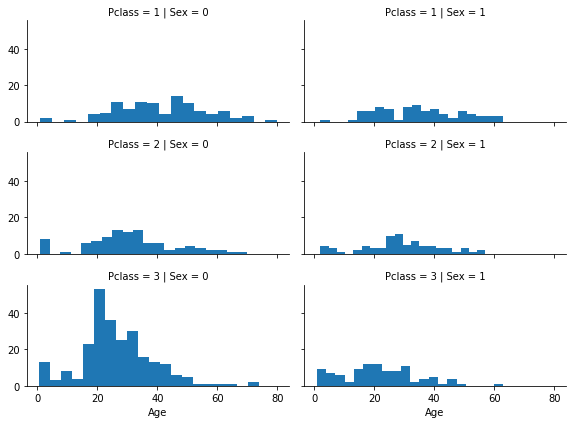

In [25]:
age = sns.FacetGrid(train_data, row='Pclass', col='Sex', height=2, aspect=2)
age.map(plt.hist, 'Age', bins=20)
age.add_legend()

Generate an array to contain Pclass-Sex age values

In [26]:
import numpy as np
guess_age = np.zeros((2,3))
guess_age

array([[0., 0., 0.],
       [0., 0., 0.]])

Calculate 6 entires for 6 combinations: Pclass=1 Female, Pclass=2 Female, Pclass=3 Female; Pclass=1 Male, Pclass=2 Male, Pclass=3 Male;

In [27]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_data = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess = guess_data.mean()
            guess_age[i,j] = int(age_guess)
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_age[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
train_data.head()
train_data.info()
guess_age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


array([[40., 30., 24.],
       [41., 24., 23.]])

create age cut

In [28]:
train_data['Age_cut'] = pd.cut(train_data['Age'], 5)
#train_data[['Age_cut', 'Survived']].groupby(['Age_cut'], as_index=False).mean().sort_values(by='Age_cut', ascending=True)
train_data[['Age_cut', 'Survived']].groupby(['Age_cut'], as_index=False).mean().sort_values(by='Age_cut', ascending=True)

,Age_cut,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [29]:
#Creat ordinals age
for dataset in combine:
    dataset.loc[(dataset.Age <= 16), 'Age'] = 0
    dataset.loc[(dataset.Age > 16) & (dataset.Age <= 32),'Age'] = 1
    dataset.loc[(dataset.Age > 32) & (dataset.Age <= 48),'Age'] = 2
    dataset.loc[(dataset.Age > 48) & (dataset.Age <= 64),'Age'] = 3
    dataset.loc[(dataset.Age > 64),'Age'] = 4
train_data.head()
#remove age_cut
#train_data = train_data.drop(['Age_cut'], axis=1)
#train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_cut
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


Create a feature Family size combining Parch and SibSp 

In [30]:
for dataset in combine:
    dataset['Family_size'] = dataset['Parch'] + dataset['SibSp'] + 1
train_data[['Family_size', 'Survived']].groupby(['Family_size'], as_index=False).mean().sort_values(by='Family_size', ascending=False)


,Family_size,Survived
8,11,0.000000
7,8,0.000000
6,7,0.333333
5,6,0.136364
4,5,0.200000
3,4,0.724138
2,3,0.578431
1,2,0.552795
0,1,0.303538


Create feature Is_alone for 1 if Family_size=0; 0 if Family_size > 1

In [31]:
for dataset in combine:
    dataset['Is_alone'] = 0
    dataset.loc[dataset['Family_size']==1, 'Is_alone'] = 1
train_data.head()
train_data[['Is_alone', 'Survived']].groupby(['Is_alone'], as_index=False).mean()

,Is_alone,Survived
0,0,0.505650
1,1,0.303538


drop parch, sibsp, family_size 

In [32]:


train_data = train_data.drop(['Parch', 'SibSp', 'Family_size'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'Family_size'], axis=1)
combine = [train_data, test_data]

In [33]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_cut,Is_alone
0,0,3,0,1,7.2500,S,1,"(16.0, 32.0]",0
1,1,1,1,2,71.2833,C,3,"(32.0, 48.0]",0
2,1,3,1,1,7.9250,S,2,"(16.0, 32.0]",1
3,1,1,1,2,53.1000,S,3,"(32.0, 48.0]",0
4,0,3,0,2,8.0500,S,1,"(32.0, 48.0]",1


Creat a feature combining age and pclass by age * pclass

In [34]:
for dataset in combine:
    dataset['Age*Pclass'] = dataset['Age'] * dataset['Pclass']
train_data.loc[:, ['Age', 'Pclass', 'Age*Pclass']].head()

,Age,Pclass,Age*Pclass
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


Filling missing values for categorical features: Embarked by most occurance

In [35]:
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_data.info()

train_data[['Embarked','Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    int64   
 3   Age         891 non-null    int64   
 4   Fare        891 non-null    float64 
 5   Embarked    891 non-null    object  
 6   Title       891 non-null    int64   
 7   Age_cut     891 non-null    category
 8   Is_alone    891 non-null    int64   
 9   Age*Pclass  891 non-null    int64   
dtypes: category(1), float64(1), int64(7), object(1)
memory usage: 63.9+ KB


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [37]:
#convert port to ordinary numeric 
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'C':2, 'Q':1, 'S':0}).astype(int)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_cut,Is_alone,Age*Pclass
0,0,3,0,1,7.2500,0,1,"(16.0, 32.0]",0,3
1,1,1,1,2,71.2833,2,3,"(32.0, 48.0]",0,2
2,1,3,1,1,7.9250,0,2,"(16.0, 32.0]",1,3
3,1,1,1,2,53.1000,0,3,"(32.0, 48.0]",0,2
4,0,3,0,2,8.0500,0,1,"(32.0, 48.0]",1,6


filling Fare in test_data by mode and convert

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Title        418 non-null    int64  
 7   Is_alone     418 non-null    int64  
 8   Age*Pclass   418 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


In [39]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Title        418 non-null    int64  
 7   Is_alone     418 non-null    int64  
 8   Age*Pclass   418 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


In [40]:
train_data['Fare_cut'] = pd.qcut(train_data['Fare'], 4)
train_data[['Fare_cut', 'Survived']].groupby('Fare_cut', as_index=False).mean().sort_values(by='Survived', ascending=True)

,Fare_cut,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert cuts to ordinal numerical values


In [41]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] <= 14.454) & (dataset['Fare'] > 7.91), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] <= 31) & dataset['Fare'] > 14.454, 'Fare'] = 2
    dataset.loc[(dataset['Fare'] >31), 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
combine = [train_data, test_data]

In [42]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_cut,Is_alone,Age*Pclass,Fare_cut
0,0,3,0,1,0,0,1,"(16.0, 32.0]",0,3,"(-0.001, 7.91]"
1,1,1,1,2,3,2,3,"(32.0, 48.0]",0,2,"(31.0, 512.329]"
2,1,3,1,1,1,0,2,"(16.0, 32.0]",1,3,"(7.91, 14.454]"
3,1,1,1,2,3,0,3,"(32.0, 48.0]",0,2,"(31.0, 512.329]"
4,0,3,0,2,1,0,1,"(32.0, 48.0]",1,6,"(7.91, 14.454]"


drop age_cut, fare_cut

In [43]:
train_data.head()
train = train_data.drop('Age_cut', axis=1)
train = train.drop('Fare_cut', axis=1)
train.head()
test = test_data

In [44]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Is_alone,Age*Pclass
0,892,3,0,2,0,1,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,1,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


**Modeling, predict, and solve**

1. Logistic regression

2. KNN or K-nearest Neighbours

3. SVM

4. Naive Bayes

5. Decision tree

6. Random Forest


prepair train set and test set:

TrainX, TrainY

TestX, TestY

In [45]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [46]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100 ,2)
acc_log

81.14

In [47]:
# logistic regression correlation
coef = pd.DataFrame(train.columns.delete(0))
coef.columns = ['Feature']
coef['correlation'] = pd.Series(logreg.coef_[0])
coef.sort_values(by='correlation', ascending=False)

,Feature,correlation
1,Sex,2.218576
5,Title,0.415625
6,Is_alone,0.309935
4,Embarked,0.279910
3,Fare,-0.000575
7,Age*Pclass,-0.028927
2,Age,-0.504127
0,Pclass,-1.128171


In [48]:
# Support vector Machines
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100 ,2)
acc_svc

78.34

In [49]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

83.95

In [50]:
# Gussian NB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred = nb.predict(X_test)
acc_nb = round(100 * nb.score(X_train, Y_train),2)
acc_nb

77.55

In [51]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
acc_tree = round(100* tree.score(X_train, Y_train),2)
acc_tree

89.67

In [52]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
acc_rf = round(100 * rf.score(X_train, Y_train),2)
acc_rf

89.67

In [53]:
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(100*sgd.score(X_train, Y_train), 2)
acc_sgd

78.56

**MODEL EVALUATION**

In [54]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Support Vector Machine', 'KNN', 'Gaussian NB', 'Decision Tree', 'Random Forest', 'SGD'],
    'Score' : [acc_log, acc_svc, acc_knn, acc_nb, acc_tree, acc_rf, acc_sgd ]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,89.67
5,Random Forest,89.67
2,KNN,83.95
0,Logistic Regression,81.14
6,SGD,78.56
1,Support Vector Machine,78.34
3,Gaussian NB,77.55


we will use Random Forest model to predict

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_Y_pred = rf.predict(X_test)
acc_rf = round(100 * rf.score(X_train, Y_train),2)
acc_rf

89.67

In [56]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": rf_Y_pred
    })
#submission.to_csv('submission1.csv', index=False)